<a href="https://colab.research.google.com/github/nataliaJanasiewicz/MIW/blob/main/projekt3/gr12c_s22847_p3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# plot_decision_regions

Importy

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # konfiguruje generator znaczników i mapę kolorów
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # rysuje wykres powierzchni decyzyjnej
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # rysuje wykres wszystkich próbek
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')



# Zadanie

##1. Rozdziel zestaw danych na podzbiory uczący i testowy,

In [ ]:
iris = datasets.load_iris() #zaladowanie iris
X = iris.data[:, [1,2]] # wybor kolumn 2 i 3
y = iris.target # wybor zmiennej objasniajacej

#podzial zbioru na test i trening z zachowaniem proporcji klas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


##2. Sprawdź działanie drzewa dla entropii i współczynnika Giniego - porównaj wyniki i uargumentuj rezultaty. 
Przykład tworzenia drzewa decyzyjnego znajduje się poniżej.
Dokumentacja klasy którą można wykorzystać do kostrukcji drzewa decyzyjnego znajduję się w linku poniżej.

[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

W drzewie decyzyjnym, entropia jest używana do określenia, jak dobrze węzeł lub podział na węzły klasyfikuje obserwacje. Im niższa entropia, tym większa pewność co do klasyfikacji obserwacji. Na przykład, jeśli węzeł jest czysty i zawiera tylko jedną klasę obserwacji, to jego entropia wynosi 0, co oznacza, że ​​klasyfikacja jest pewna. Z drugiej strony, im wyższa entropia, tym większa niepewność i trudniej określić klasyfikację obserwacji.


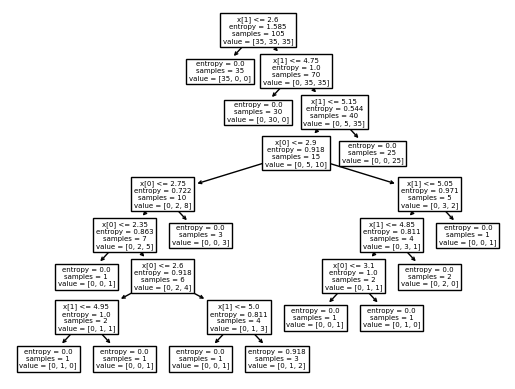

In [ ]:
#klasyfikator drzewa decyzyjnego z kryterium entropii
entropy = tree.DecisionTreeClassifier(criterion='entropy') # Uzupełnić parametry konstruktora
#entropy = tree.DecisionTreeClassifier(criterion='entropy',splitter='best')
#entropy = tree.DecisionTreeClassifier(criterion='entropy',splitter='random')

#trenowanie klasyfikatora
entropy = entropy.fit(X_train, y_train)

#rysowanie
tree.plot_tree(entropy) 

#wyswietlenie
plt.show()

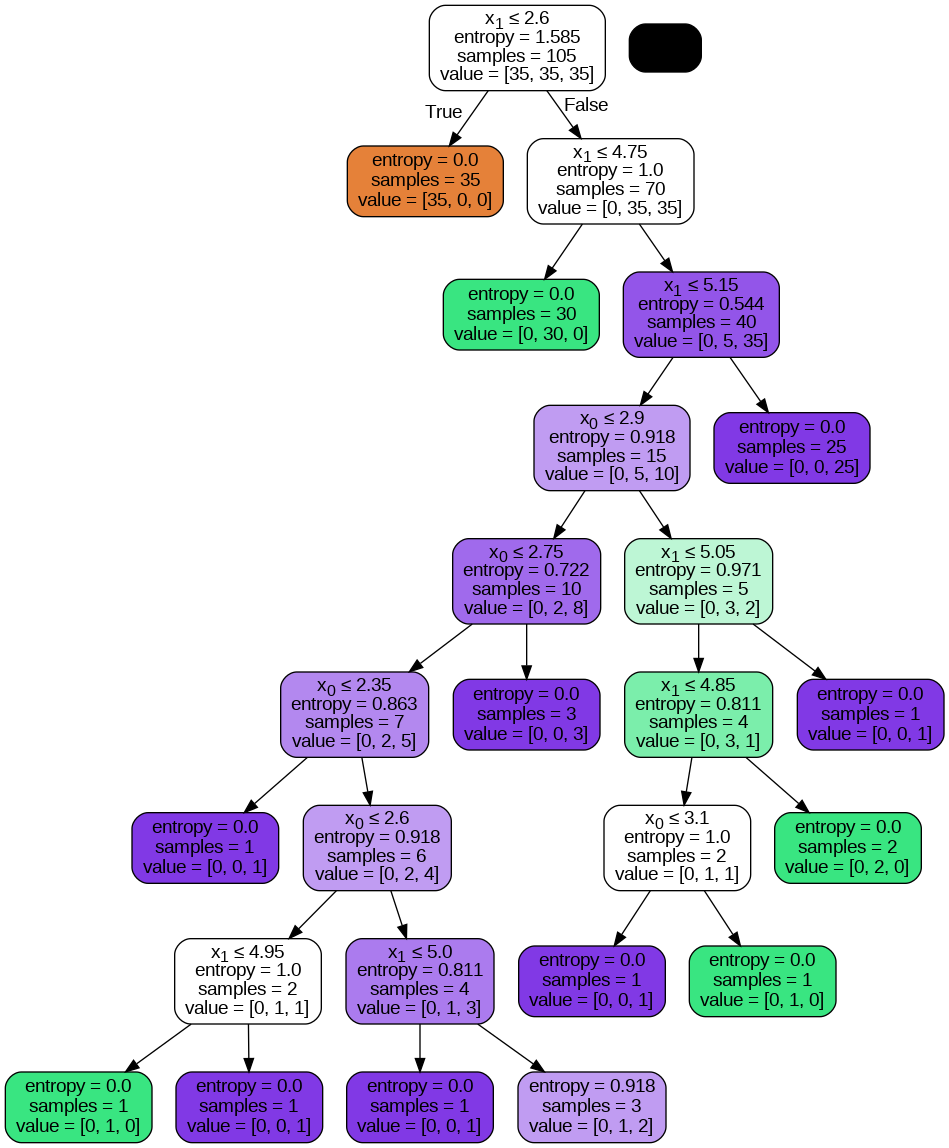

In [ ]:
#eksportowanie drzewa w postaci graficznej
dat = export_graphviz(entropy, out_file=None,  
                filled=True, rounded=True,
                special_characters=True)

#tworzenie grafu
graph = pydotplus.graph_from_dot_data(dat)

#zapisanie grafu do pliku
graph.write_png('entropy.png')

#wyswietlenie grafu
Image(graph.create_png())

<ipython-input-3-bd9613d9f67a>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
<ipython-input-3-bd9613d9f67a>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


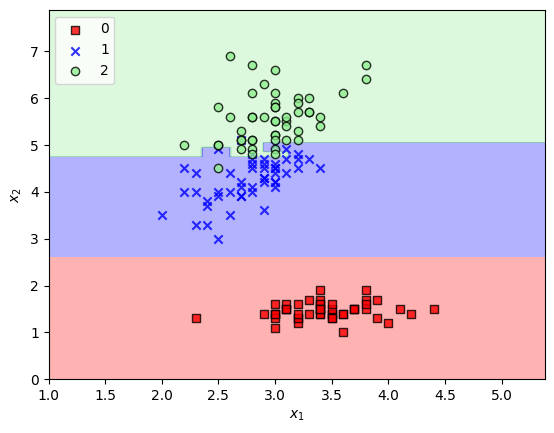

In [ ]:
#rysowanie regionow decyzyjnych
plot_decision_regions(X=X, y=y, classifier=entropy)

#etykiety osi
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

#dodanie legenty
plt.legend(loc='upper left')

#wyswietlenie
plt.show()

## Gini

Gini to inna miara impurity (nieczystości) używana w drzewach decyzyjnych. Gini impurity mierzy losową błędność klasyfikacji losowo wybranego elementu, jeśli losowo wybierzemy dwie próbki z populacji, to gini impurity mierzy szansę na to, że te dwie próbki będą różne klasami. W drzewach decyzyjnych, gini impurity jest używana jako kryterium do wyboru najlepszego podziału w każdym węźle drzewa. Podział o mniejszej gini impurity jest preferowany, ponieważ oznacza to większą czystość podzbiorów.

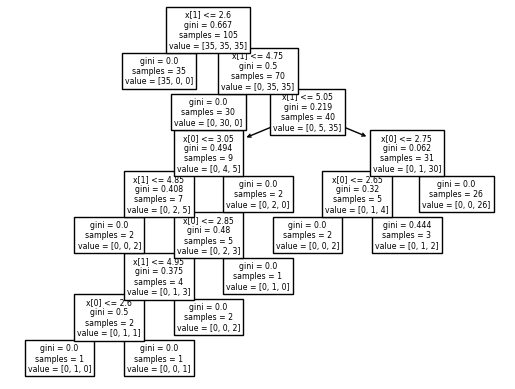

In [ ]:
#klasyfikator drzewa decyzyjnego z kryterium gini
gini = tree.DecisionTreeClassifier(criterion='gini') # Uzupełnić parametry konstruktora
#gini = tree.DecisionTreeClassifier(criterion='gini',splitter='best')
#gini = tree.DecisionTreeClassifier(criterion='gini',splitter='random')

#trenowanie klasyfikatora
gini = gini.fit(X_train, y_train)

#rysowanie
tree.plot_tree(gini) 

#wyswietlenie
plt.show()

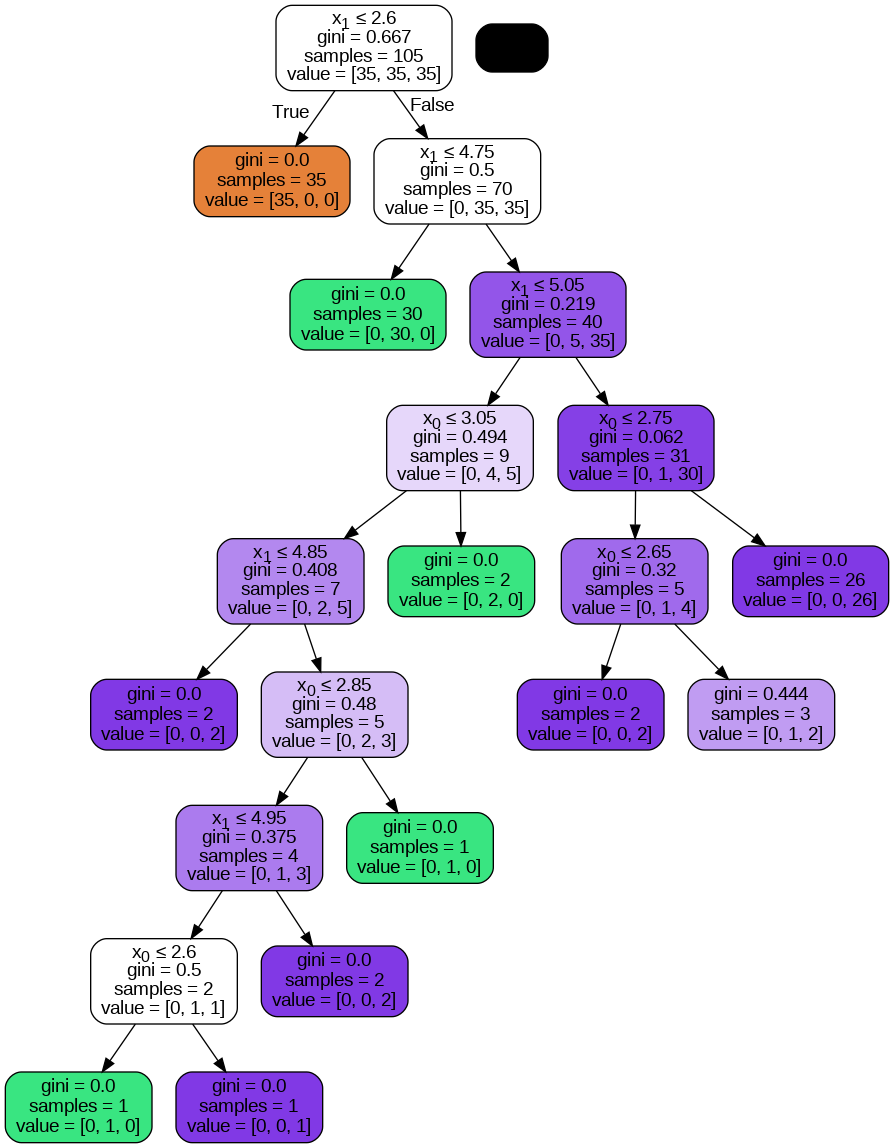

In [ ]:
dat = export_graphviz(gini, out_file=None,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dat)  
graph.write_png('gini.png')
Image(graph.create_png())

<ipython-input-3-bd9613d9f67a>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
<ipython-input-3-bd9613d9f67a>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


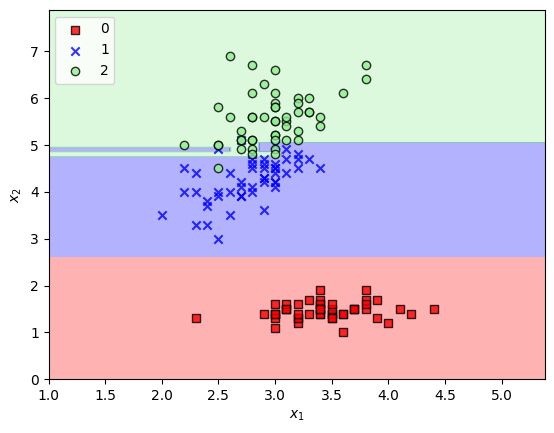

In [ ]:
plot_decision_regions(X=X, y=y, classifier=gini)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc='upper left')
plt.show()

##3. Sprawdź działanie drzewa dla różnych głębokości drzewa - porównaj wyniki i uargumentuj rezultaty.

drzewo dla danej glebokosci d entropia i best
Dokladnosc dla glebokosci:  2  wynosi:  0.9555555555555556
Dokladnosc dla glebokosci:  3  wynosi:  0.9555555555555556
Dokladnosc dla glebokosci:  4  wynosi:  0.8888888888888888
Dokladnosc dla glebokosci:  5  wynosi:  0.9333333333333333
Dokladnosc dla glebokosci:  6  wynosi:  0.9333333333333333
Dokladnosc dla glebokosci:  7  wynosi:  0.9333333333333333
Dokladnosc dla glebokosci:  8  wynosi:  0.9333333333333333
Dokladnosc dla glebokosci:  9  wynosi:  0.9333333333333333
Dokladnosc dla glebokosci:  10  wynosi:  0.9333333333333333
Dokladnosc dla glebokosci:  11  wynosi:  0.9333333333333333
Dokladnosc dla glebokosci:  12  wynosi:  0.9333333333333333


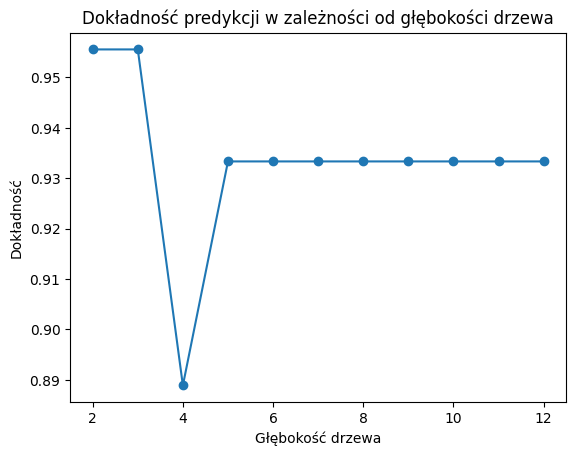

drzewo dla danej glebokosci d entropia i random
Dokladnosc dla glebokosci:  2  wynosi:  0.7111111111111111
Dokladnosc dla glebokosci:  3  wynosi:  0.8666666666666667
Dokladnosc dla glebokosci:  4  wynosi:  0.8666666666666667
Dokladnosc dla glebokosci:  5  wynosi:  0.8444444444444444
Dokladnosc dla glebokosci:  6  wynosi:  0.9111111111111111
Dokladnosc dla glebokosci:  7  wynosi:  0.9333333333333333
Dokladnosc dla glebokosci:  8  wynosi:  0.9333333333333333
Dokladnosc dla glebokosci:  9  wynosi:  0.9333333333333333
Dokladnosc dla glebokosci:  10  wynosi:  0.9333333333333333
Dokladnosc dla glebokosci:  11  wynosi:  0.9333333333333333
Dokladnosc dla glebokosci:  12  wynosi:  0.9111111111111111


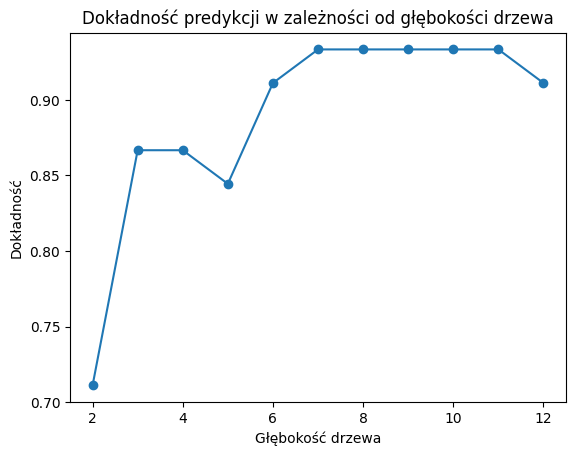

drzewo dla danej glebokosci d gini i best
Dokladnosc dla glebokosci:  2  wynosi:  0.9555555555555556
Dokladnosc dla glebokosci:  3  wynosi:  0.9555555555555556
Dokladnosc dla glebokosci:  4  wynosi:  0.9555555555555556
Dokladnosc dla glebokosci:  5  wynosi:  0.9555555555555556
Dokladnosc dla glebokosci:  6  wynosi:  0.9333333333333333
Dokladnosc dla glebokosci:  7  wynosi:  0.9111111111111111
Dokladnosc dla glebokosci:  8  wynosi:  0.9333333333333333
Dokladnosc dla glebokosci:  9  wynosi:  0.9333333333333333
Dokladnosc dla glebokosci:  10  wynosi:  0.9333333333333333
Dokladnosc dla glebokosci:  11  wynosi:  0.9333333333333333
Dokladnosc dla glebokosci:  12  wynosi:  0.9333333333333333


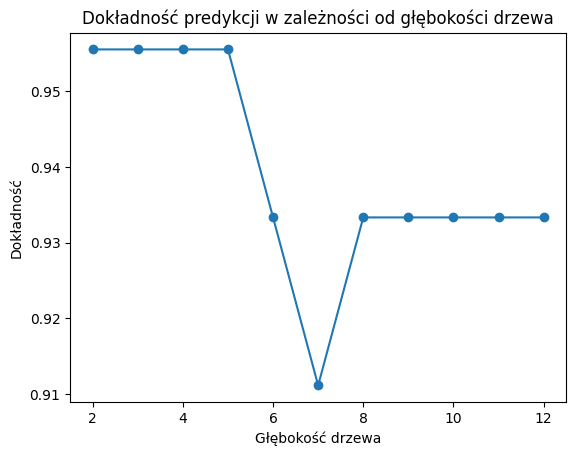

drzewo dla danej glebokosci d gini i random
Dokladnosc dla glebokosci:  2  wynosi:  0.7111111111111111
Dokladnosc dla glebokosci:  3  wynosi:  0.8666666666666667
Dokladnosc dla glebokosci:  4  wynosi:  0.8666666666666667
Dokladnosc dla glebokosci:  5  wynosi:  0.8666666666666667
Dokladnosc dla glebokosci:  6  wynosi:  0.8888888888888888
Dokladnosc dla glebokosci:  7  wynosi:  0.9777777777777777
Dokladnosc dla glebokosci:  8  wynosi:  0.8666666666666667
Dokladnosc dla glebokosci:  9  wynosi:  0.9111111111111111
Dokladnosc dla glebokosci:  10  wynosi:  0.9111111111111111
Dokladnosc dla glebokosci:  11  wynosi:  0.9111111111111111
Dokladnosc dla glebokosci:  12  wynosi:  0.9111111111111111


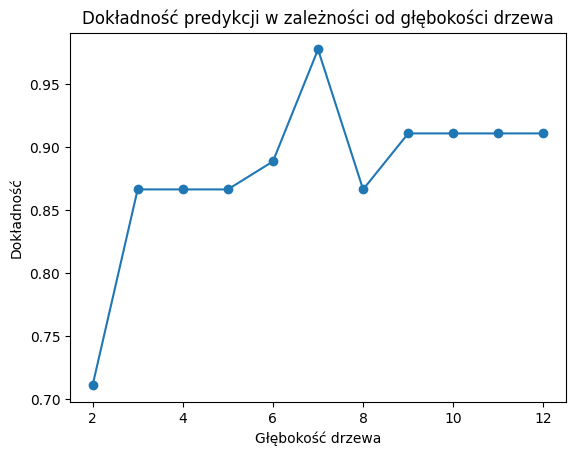

In [ ]:
#tabela dra roznych wysokosci 
depths = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

#tabela dla dokladnosci w zaleznosci od kryterii i od splittera
acc_e_b = []
acc_e_r = []
acc_g_b = []
acc_g_r = []

#sprawdzanie dokladnosci dla kazdej glebokosci
print("drzewo dla danej glebokosci d entropia i best")
for d in depths:
    #drzewo dla danej glebokosci d entropia i best
    tree_d = tree.DecisionTreeClassifier(criterion='entropy',max_depth=d, random_state=2, splitter='best')
    tree_d.fit(X_train, y_train)

    #obliczanie dokladosci 
    y_pred = tree_d.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc_e_b.append(accuracy)

    print("Dokladnosc dla glebokosci: ", d, " wynosi: ", accuracy)

#wykres do reprezentacji wynikow
plt.plot(depths, acc_e_b, marker='o')
plt.xlabel('Głębokość drzewa')
plt.ylabel('Dokładność')
plt.title('Dokładność predykcji w zależności od głębokości drzewa')
plt.show()

print("drzewo dla danej glebokosci d entropia i random")
for d in depths:
    #drzewo dla danej glebokosci d entropia i random
    tree_d = tree.DecisionTreeClassifier(criterion='entropy',max_depth=d, random_state=2, splitter='random')
    tree_d.fit(X_train, y_train)

    #obliczanie dokladosci 
    y_pred = tree_d.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc_e_r.append(accuracy)

    print("Dokladnosc dla glebokosci: ", d, " wynosi: ", accuracy)

#wykres do reprezentacji wynikow
plt.plot(depths, acc_e_r, marker='o')
plt.xlabel('Głębokość drzewa')
plt.ylabel('Dokładność')
plt.title('Dokładność predykcji w zależności od głębokości drzewa')
plt.show()

print("drzewo dla danej glebokosci d gini i best")
for d in depths:
    #drzewo dla danej glebokosci d gini i best
    tree_d = tree.DecisionTreeClassifier(criterion='gini',max_depth=d, random_state=2, splitter='best')
    tree_d.fit(X_train, y_train)

    #obliczanie dokladosci 
    y_pred = tree_d.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc_g_b.append(accuracy)

    print("Dokladnosc dla glebokosci: ", d, " wynosi: ", accuracy)

#wykres do reprezentacji wynikow
plt.plot(depths, acc_g_b, marker='o')
plt.xlabel('Głębokość drzewa')
plt.ylabel('Dokładność')
plt.title('Dokładność predykcji w zależności od głębokości drzewa')
plt.show()

print("drzewo dla danej glebokosci d gini i random")
for d in depths:
    #drzewo dla danej glebokosci d gini i random
    tree_d = tree.DecisionTreeClassifier(criterion='gini',max_depth=d, random_state=2, splitter='random')
    tree_d.fit(X_train, y_train)

    #obliczanie dokladosci 
    y_pred = tree_d.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc_g_r.append(accuracy)

    print("Dokladnosc dla glebokosci: ", d, " wynosi: ", accuracy)

    

#wykres do reprezentacji wynikow
plt.plot(depths, acc_g_r, marker='o')
plt.xlabel('Głębokość drzewa')
plt.ylabel('Dokładność')
plt.title('Dokładność predykcji w zależności od głębokości drzewa')
plt.show()

##4. Sprawdź działanie lasów losowych dla różnej liczby drzew decyzyjnych - porównaj wyniki i uargumentuj rezultaty.

<ipython-input-3-bd9613d9f67a>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
<ipython-input-3-bd9613d9f67a>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')



 dokladnosc dla ilosci drze:  5  wynosi:  0.9555555555555556


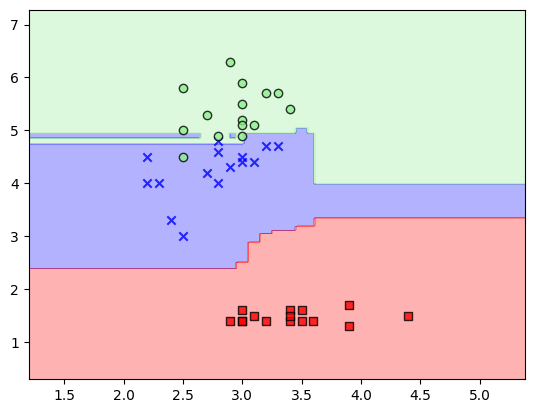

<ipython-input-3-bd9613d9f67a>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
<ipython-input-3-bd9613d9f67a>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')



 dokladnosc dla ilosci drze:  10  wynosi:  0.9333333333333333


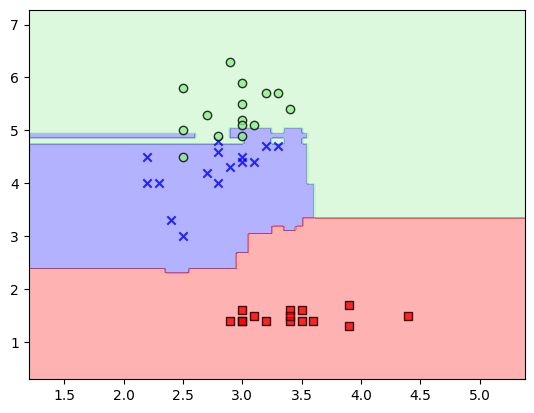

<ipython-input-3-bd9613d9f67a>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
<ipython-input-3-bd9613d9f67a>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')



 dokladnosc dla ilosci drze:  25  wynosi:  0.9555555555555556


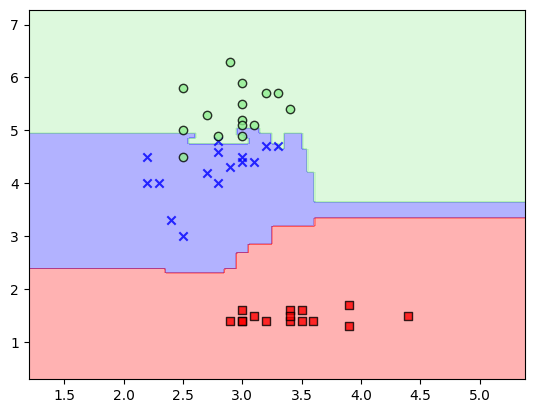

<ipython-input-3-bd9613d9f67a>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
<ipython-input-3-bd9613d9f67a>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')



 dokladnosc dla ilosci drze:  50  wynosi:  0.9555555555555556


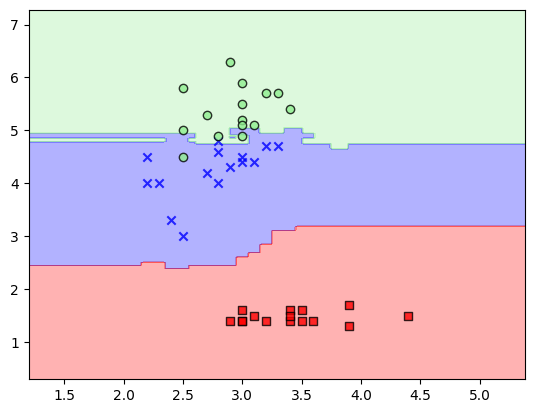

<ipython-input-3-bd9613d9f67a>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
<ipython-input-3-bd9613d9f67a>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')



 dokladnosc dla ilosci drze:  100  wynosi:  0.9555555555555556


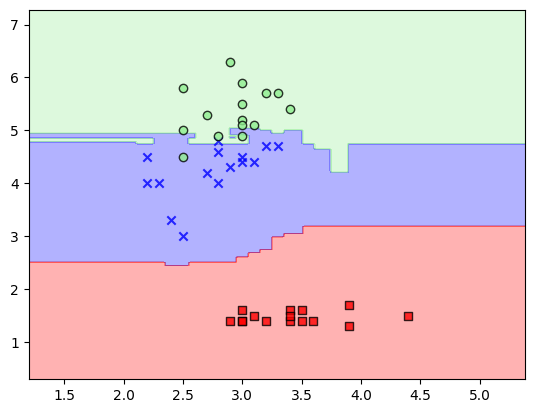


 dokladnosc dla ilosci drze:  150  wynosi:  0.9555555555555556


<ipython-input-3-bd9613d9f67a>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
<ipython-input-3-bd9613d9f67a>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


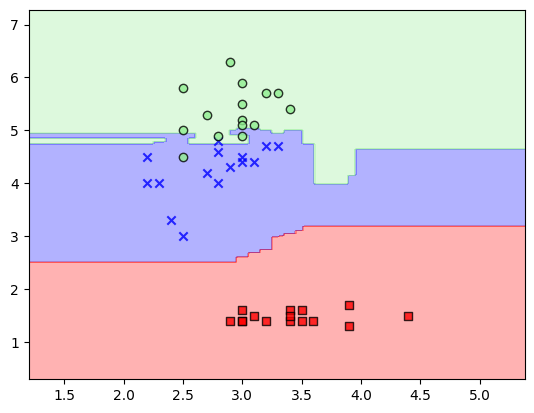

<ipython-input-3-bd9613d9f67a>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
<ipython-input-3-bd9613d9f67a>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')



 dokladnosc dla ilosci drze:  200  wynosi:  0.9555555555555556


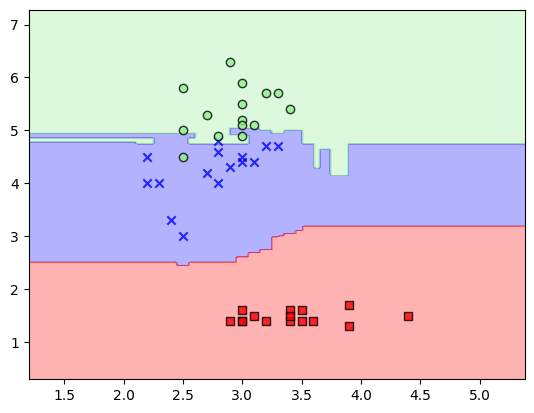

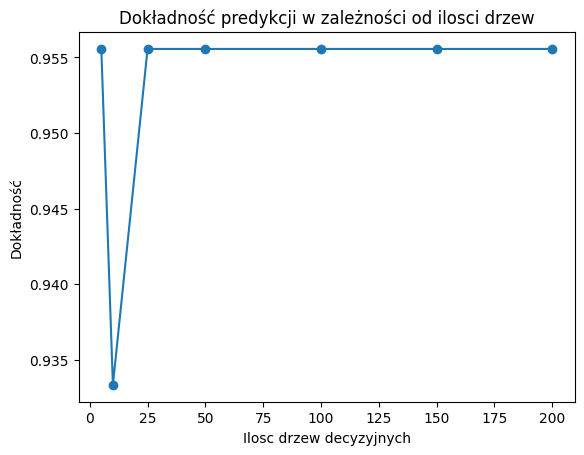

In [ ]:
#tabela ilosci drzew
n_tree = [5 , 10, 25, 50, 100, 150, 200]
acc = []

for n in n_tree:
    # tworzenie modelu lasow losowych
    forest = RandomForestClassifier(criterion='entropy', n_estimators=n, random_state=1)

    #trenowanie
    forest.fit(X_train, y_train)

    #testowanie
    y_pred = forest.predict(X_test)

    #dokladnosc
    plot_decision_regions(X_test, y_test, classifier=forest)
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    print("\n dokladnosc dla ilosci drze: ", n, " wynosi: " , accuracy)
    plt.show()

plt.plot(n_tree, acc, marker='o')
plt.xlabel('Ilosc drzew decyzyjnych')
plt.ylabel('Dokładność')
plt.title('Dokładność predykcji w zależności od ilosci drzew')
plt.show()